<a href="https://colab.research.google.com/github/rontalapoojareddy/DeepLearning1/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2503B05130 (M.TECH)**

**Rontala Pooja Reddy**


**Imports**

In [10]:


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os


**Variables**

In [11]:
batch_size = 128      # images processed at once
epochs = 30           # how many times model sees full data
learning_rate = 0.0002
latent_dim = 100      # random noise size
image_size = 28 * 28  # MNIST image size


**Dataset**

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(
    root="./data",
    train=True,
    transform=transform,
    download=True
)

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.47MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.2MB/s]


**Generator**

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

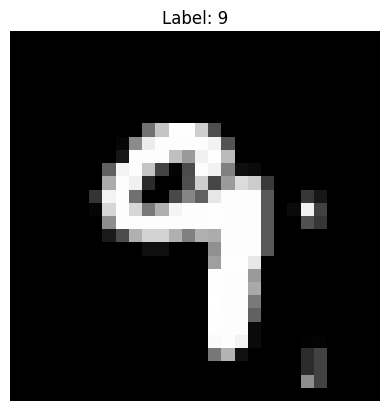

In [13]:
images, labels = next(iter(dataloader))
plt.imshow(images[0].squeeze(), cmap="gray")
plt.title(f"Label: {labels[0]}")
plt.axis("off")


**Dataset**

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)



**Generator**

In [15]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, image_size),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)


**Discriminator**

In [16]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(image_size, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


**Models + Optimizers**

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generator = Generator().to(device)
discriminator = Discriminator().to(device)

loss_fn = nn.BCELoss()
opt_G = optim.Adam(generator.parameters(), lr=learning_rate)
opt_D = optim.Adam(discriminator.parameters(), lr=learning_rate)


**Training Loop**

In [31]:
g_losses = []
d_losses = []

for epoch in range(epochs):
    for real_images, _ in dataloader:

        real_images = real_images.view(-1, image_size).to(device)
        batch = real_images.size(0)

        real_labels = torch.ones(batch, 1).to(device)
        fake_labels = torch.zeros(batch, 1).to(device)

        # ---- Train Discriminator ----
        opt_D.zero_grad()
        real_loss = loss_fn(discriminator(real_images), real_labels)

        noise = torch.randn(batch, latent_dim).to(device)
        fake_images = generator(noise)
        fake_loss = loss_fn(discriminator(fake_images.detach()), fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        opt_D.step()

        # ---- Train Generator ----
        opt_G.zero_grad()
        g_loss = loss_fn(discriminator(fake_images), real_labels)
        g_loss.backward()
        opt_G.step()

        # ✅ STORE LOSSES HERE
        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())

    print(f"Epoch {epoch+1}/{epochs} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


Epoch 1/30 | D Loss: 0.4670 | G Loss: 2.9990
Epoch 2/30 | D Loss: 0.3274 | G Loss: 3.3127
Epoch 3/30 | D Loss: 0.5567 | G Loss: 2.1095
Epoch 4/30 | D Loss: 0.3657 | G Loss: 3.4946
Epoch 5/30 | D Loss: 0.3648 | G Loss: 3.8396
Epoch 6/30 | D Loss: 0.5271 | G Loss: 3.3517
Epoch 7/30 | D Loss: 0.4619 | G Loss: 2.8762
Epoch 8/30 | D Loss: 0.5010 | G Loss: 2.7162
Epoch 9/30 | D Loss: 0.5556 | G Loss: 2.3702
Epoch 10/30 | D Loss: 0.3518 | G Loss: 2.3823
Epoch 11/30 | D Loss: 0.5893 | G Loss: 2.5429
Epoch 12/30 | D Loss: 0.5827 | G Loss: 2.7573
Epoch 13/30 | D Loss: 0.6112 | G Loss: 2.4603
Epoch 14/30 | D Loss: 0.7071 | G Loss: 2.7510
Epoch 15/30 | D Loss: 0.8535 | G Loss: 2.5613
Epoch 16/30 | D Loss: 0.5162 | G Loss: 2.7722
Epoch 17/30 | D Loss: 0.6855 | G Loss: 2.7470
Epoch 18/30 | D Loss: 0.4212 | G Loss: 2.4018
Epoch 19/30 | D Loss: 0.6315 | G Loss: 1.8775
Epoch 20/30 | D Loss: 0.6008 | G Loss: 2.0396
Epoch 21/30 | D Loss: 0.6640 | G Loss: 2.8680
Epoch 22/30 | D Loss: 0.5937 | G Loss: 2.43

**Image generation code**

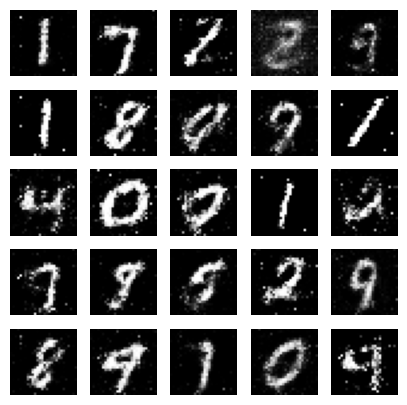

In [32]:
generator.eval()

with torch.no_grad():
    noise = torch.randn(25, latent_dim).to(device)
    fake_images = generator(noise).view(-1, 1, 28, 28)
    fake_images = (fake_images + 1) / 2

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(fake_images[i].cpu().squeeze(), cmap="gray")
    plt.axis("off")
plt.show()


In [33]:
plt.imsave("generated_sample.png", fake_images[0].cpu().squeeze(), cmap="gray")


In [34]:

g_losses.append(g_loss.item())
d_losses.append(d_loss.item())


**Plot Loss Curves**

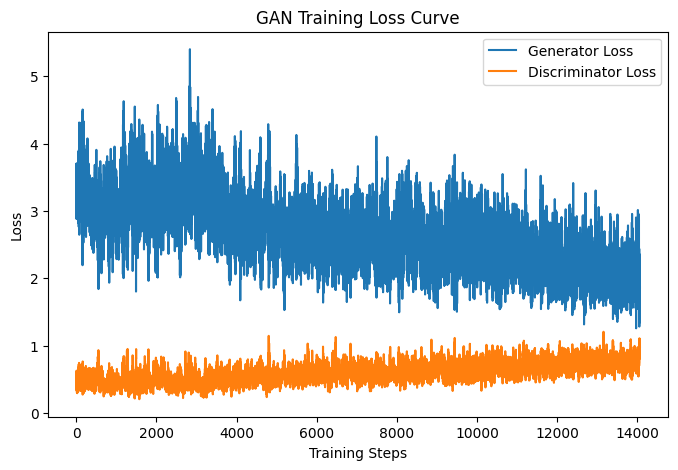

In [35]:
plt.figure(figsize=(8,5))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("GAN Training Loss Curve")
plt.show()
